<a href="https://colab.research.google.com/github/PriyangaSekar/SENTIMENT-ANALAYSIS-FOR-STOCK-MARKET/blob/main/Stock_Market_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
url = 'https://finviz.com/quote.ashx?t=AMZN'

In [ ]:
web_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}
tickers = ['AMZN', 'GOOG', 'TSLA']

for tick in tickers:
    url = web_url + tick
    req = Request(url=url,headers={"User-Agent": "Chrome"}) 
    response = urlopen(req)    
    html = BeautifulSoup(response,"html.parser")
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table

In [ ]:
amazon = news_tables['AMZN']
amazon_tr = amazon.findAll('tr')

for x, table_row in enumerate(amazon_tr):
    a_text = table_row.a.text
    td_text = table_row.td.text
    print(a_text)
    print(td_text)
    if x == 3:
        break

37 Mistakes We Make When Shopping at Costco, Amazon, Target and Walmart
Feb-27-23 12:00PM
Microsoft Pushes AI-Powered Tools for Telecoms. Its Targeting Amazon.
11:34AM
If You Invested $10,000 In Amazon Stock 10 Years Ago, This Is How Much You Would Have Today
09:55AM
Amazon Commits Resources For Same-Day Delivery Boost To Drive Bottomline Growth
09:54AM


In [ ]:
news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        
        text = i.a.get_text() 
        
        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]
        
        news_list.append([tick, date, time, text])

In [ ]:
 news_list

[['AMZN',
  'Feb-27-23',
  '12:00PM',
  '37 Mistakes We Make When Shopping at Costco, Amazon, Target and Walmart'],
 ['AMZN',
  'Feb-27-23',
  '11:34AM',
  'Microsoft Pushes AI-Powered Tools for Telecoms. Its Targeting Amazon.'],
 ['AMZN',
  'Feb-27-23',
  '09:55AM',
  'If You Invested $10,000 In Amazon Stock 10 Years Ago, This Is How Much You Would Have Today'],
 ['AMZN',
  'Feb-27-23',
  '09:54AM',
  'Amazon Commits Resources For Same-Day Delivery Boost To Drive Bottomline Growth'],
 ['AMZN',
  'Feb-27-23',
  '09:35AM',
  'These 2 Under-the-Radar Stocks Have Incredibly Bright Futures'],
 ['AMZN',
  'Feb-27-23',
  '08:34AM',
  'Retail And E-Commerce News And Stocks To Watch'],
 ['AMZN',
  'Feb-27-23',
  '07:00AM',
  'Further weakness as Amazon.com (NASDAQ:AMZN) drops 3.8% this week, taking one-year losses to 39%'],
 ['AMZN',
  'Feb-27-23',
  '06:54AM',
  'Amazon driver breaks down the A.I. system watching workers for safety violations like drinking coffee while driving and counting th

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

news_df = pd.DataFrame(news_list, columns=columns)

scores = news_df['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

news_df = news_df.join(scores_df, rsuffix='_right')

news_df['date'] = pd.to_datetime(news_df.date).dt.date

print(news_df.head())

  ticker        date     time  \
0   AMZN  2023-02-27  12:00PM   
1   AMZN  2023-02-27  11:34AM   
2   AMZN  2023-02-27  09:55AM   
3   AMZN  2023-02-27  09:54AM   
4   AMZN  2023-02-27  09:35AM   

                                            headline    neg    neu    pos  \
0  37 Mistakes We Make When Shopping at Costco, A...  0.176  0.704  0.120   
1  Microsoft Pushes AI-Powered Tools for Telecoms...  0.000  0.825  0.175   
2  If You Invested $10,000 In Amazon Stock 10 Yea...  0.000  0.909  0.091   
3  Amazon Commits Resources For Same-Day Delivery...  0.000  0.464  0.536   
4  These 2 Under-the-Radar Stocks Have Incredibly...  0.000  0.653  0.347   

   compound  
0   -0.2023  
1    0.1779  
2    0.1779  
3    0.7269  
4    0.4927  


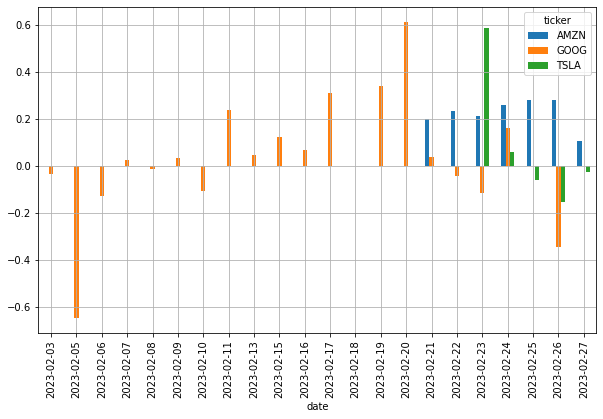

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

mean_scores = news_df.groupby(['ticker','date']).mean()

mean_scores = mean_scores.unstack()

mean_scores = mean_scores.xs('compound', axis="columns").transpose()

mean_scores.plot(kind = 'bar')

plt.grid()

plt.show()